In [3]:
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.style.use('figure_setup.mplstyle')
import pickle as pkl

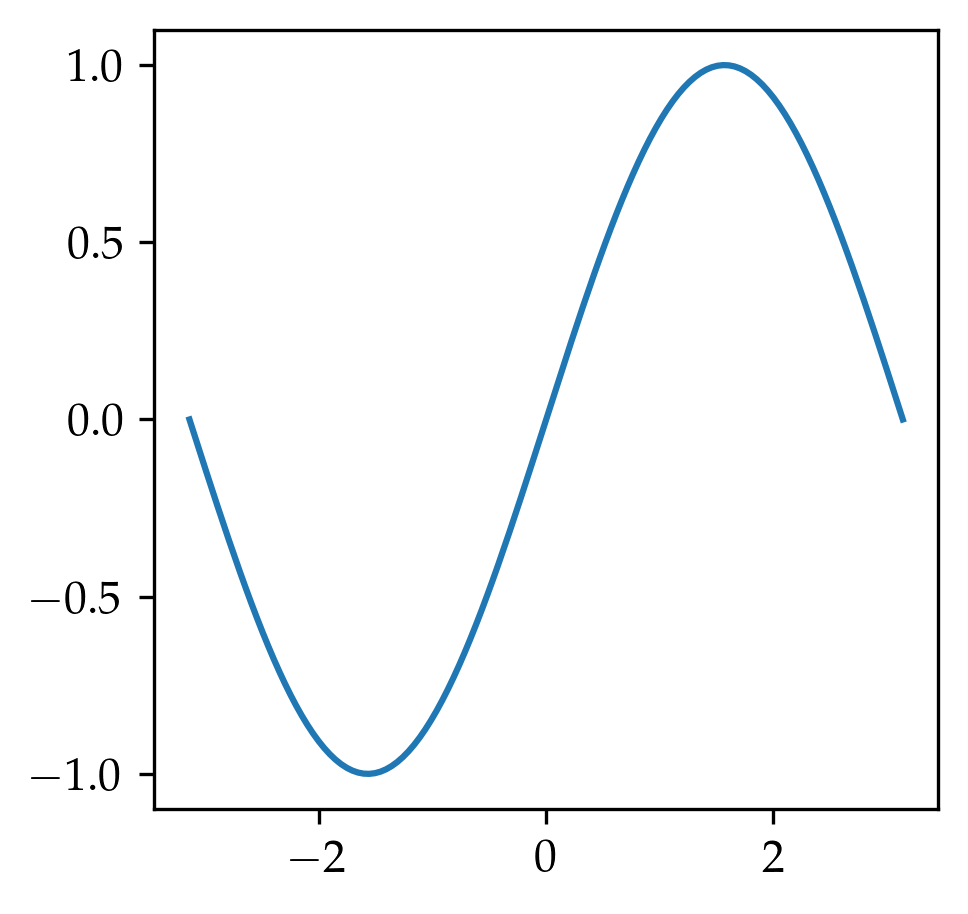

In [4]:
import numpy as np
X = np.linspace(-np.pi,np.pi,128)
Y = np.sin(X)

fig = plt.figure()
#FIGURE WIDTH IS DEFINED IN PR-B STYLEGUIDE! ONLY CHANGE FIGURE HEIGHT!
fig.set_figheight(fig.get_figwidth())
ax = fig.add_subplot()

ax.plot(X,Y)


# System Plots

## Mesh and Example Wave Function
Done in Paraview

## Potential
Plot as Filled contour plot AND regular Contour plot

In [7]:
with open('potential.pkl','rb') as f:
    pot = pkl.load(f)

with open('geometry.pkl','rb') as f:
    X = pkl.load(f)*6.282199999999999e-07*1e9 # nanometers #This is to convert from the length scale used in the mesh to SI units
print(pot.shape,X.shape)

(25351,) (25351, 3)


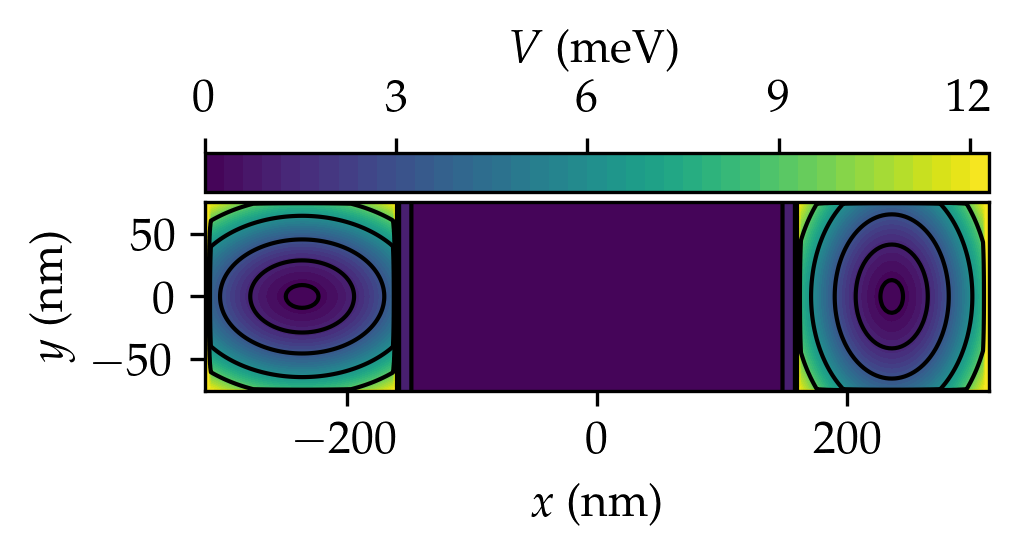

In [8]:

fig, ax = plt.subplots()

ax.set_aspect('equal')


fig.set_figheight(fig.get_figwidth()*1.2)
v_max = np.max(pot)
contour_lines = v_max*np.array([0.01,0.1,0.25,0.5,0.75])
f=ax.tricontour(X[:,0],X[:,1],pot,levels=contour_lines,colors='k',linewidths=1)
f=ax.tricontourf(X[:,0],X[:,1],pot,levels=48)
ax.set_xlabel('$x$ (nm)')
ax.set_ylabel('$y$ (nm)')

fig.colorbar(f, label='$V$ (meV)',ticks=[0,3,6,9,12],orientation='horizontal',location='top',pad=0.01)


plt.savefig('potential.pdf')

#fig.colorbar(f)

## Wavefunctions


(25351,) (25351, 3)


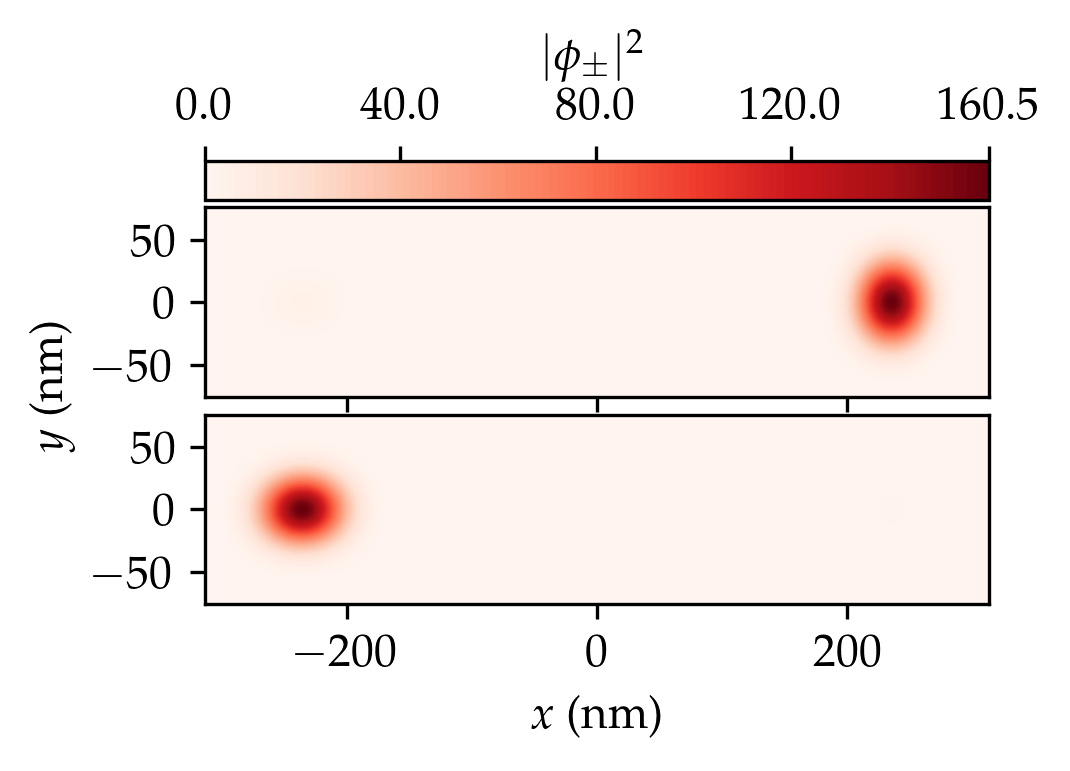

In [32]:
with open('wave_funcs_SWEET.pkl','rb') as f:
    states = pkl.load(f)

with open('geometry_SWEET.pkl','rb') as f:
    X = pkl.load(f)*6.282199999999999e-07*1e9 # nanometers # This is to convert from the length scale used in the mesh to SI units
print(pot.shape,X.shape)


fig, axs = plt.subplots(2,sharex=True)

plt.subplots_adjust(wspace=-1,hspace=-0.5)


# for getting sizing correct: We have to meausre by hand because colorbars etc mess things up
fig.set_figheight(fig.get_figwidth()*0.7)

theta = 3.0837185625945875
majorana_1  =1/np.sqrt(2)*(np.exp(1j*theta)*states[0]+np.exp(-1j*theta)*states[1]).reshape(8,-1)
majorana_2 = 1/np.sqrt(2)*(np.exp(1j*theta)*states[0]-np.exp(-1j*theta)*states[1]).reshape(8,-1)

axs[1].set_aspect('equal')
axs[0].set_aspect('equal')
majorana_1 = np.linalg.norm(majorana_1,axis=0)**2
majorana_2 = np.linalg.norm(majorana_2,axis=0)**2

norm = mpl.colors.Normalize()

norm.autoscale(np.stack([majorana_1,majorana_2]))

v_max = np.max(pot)
f1=axs[0].tricontourf(X[:,0],X[:,1],majorana_1,levels=128,cmap='Reds',norm=norm)
f2=axs[1].tricontourf(X[:,0],X[:,1],majorana_2,levels=128,cmap='Reds',norm=norm)
axs[1].set_xlabel('$x$ (nm)')
axs[1].set_ylabel('$y$ (nm)',y=1.15)
ax.set_title(r'$V$')
plt.savefig('majoranas.pdf')

cbar_range = (max(np.max(majorana_1),np.max(majorana_2)), min(np.min(majorana_1),np.min(majorana_2)))
cbar_ticks = np.linspace(*cbar_range,5)
cbar_ticks = [0,40,80,120,160.5]
cbar = fig.colorbar(f1, label='$|\phi_{\pm}|^2$ ',orientation='horizontal',location='top',pad=0.02,ticks = cbar_ticks)


# Sweet Spot Plots

In [16]:
import pandas as pd
with open('sweet_spot_df.pkl','rb') as f:
    df = pkl.load(f)
E0 = 1.60217663e-22*1e-3 # i micro eV
base_E = 4600
for n in ('mu_sc_val','mL','mR'): #E0 and deltaE are already in muEV
    df[n] = df[n]/E0-base_E#

df
#df['deltaE'] = df['deltaE']+df['E0']

,mu_sc_val,mL,mR,E0,overlaps_0,overlaps_new_0,deltaE
0,-217.999989,-1.749989,3.000011,0.304441,0.386519+0.000000j,0.386519,0.297799
1,-217.999989,-1.734116,3.000011,0.299240,0.397763+0.000000j,0.397763,0.294096
2,-217.999989,-1.718242,3.000011,0.293676,0.408393+0.000000j,0.408393,0.291167
3,-217.999989,-1.702369,3.000011,0.287737,0.418277+0.000000j,0.418277,0.289033
4,-217.999989,-1.686496,3.000011,0.281417,0.427298+0.000000j,0.427298,0.287714
...,...,...,...,...,...,...,...
32763,-174.999989,-0.813481,4.000011,0.356217,0.183510+0.000000j,0.183510,0.384529
32764,-174.999989,-0.797608,4.000011,0.366856,0.183929+0.000000j,0.183929,0.378461
32765,-174.999989,-0.781735,4.000011,0.377223,0.184157+0.000000j,0.184157,0.372943
32766,-174.999989,-0.765862,4.000011,0.387307,0.184169+0.000000j,0.184169,0.368000


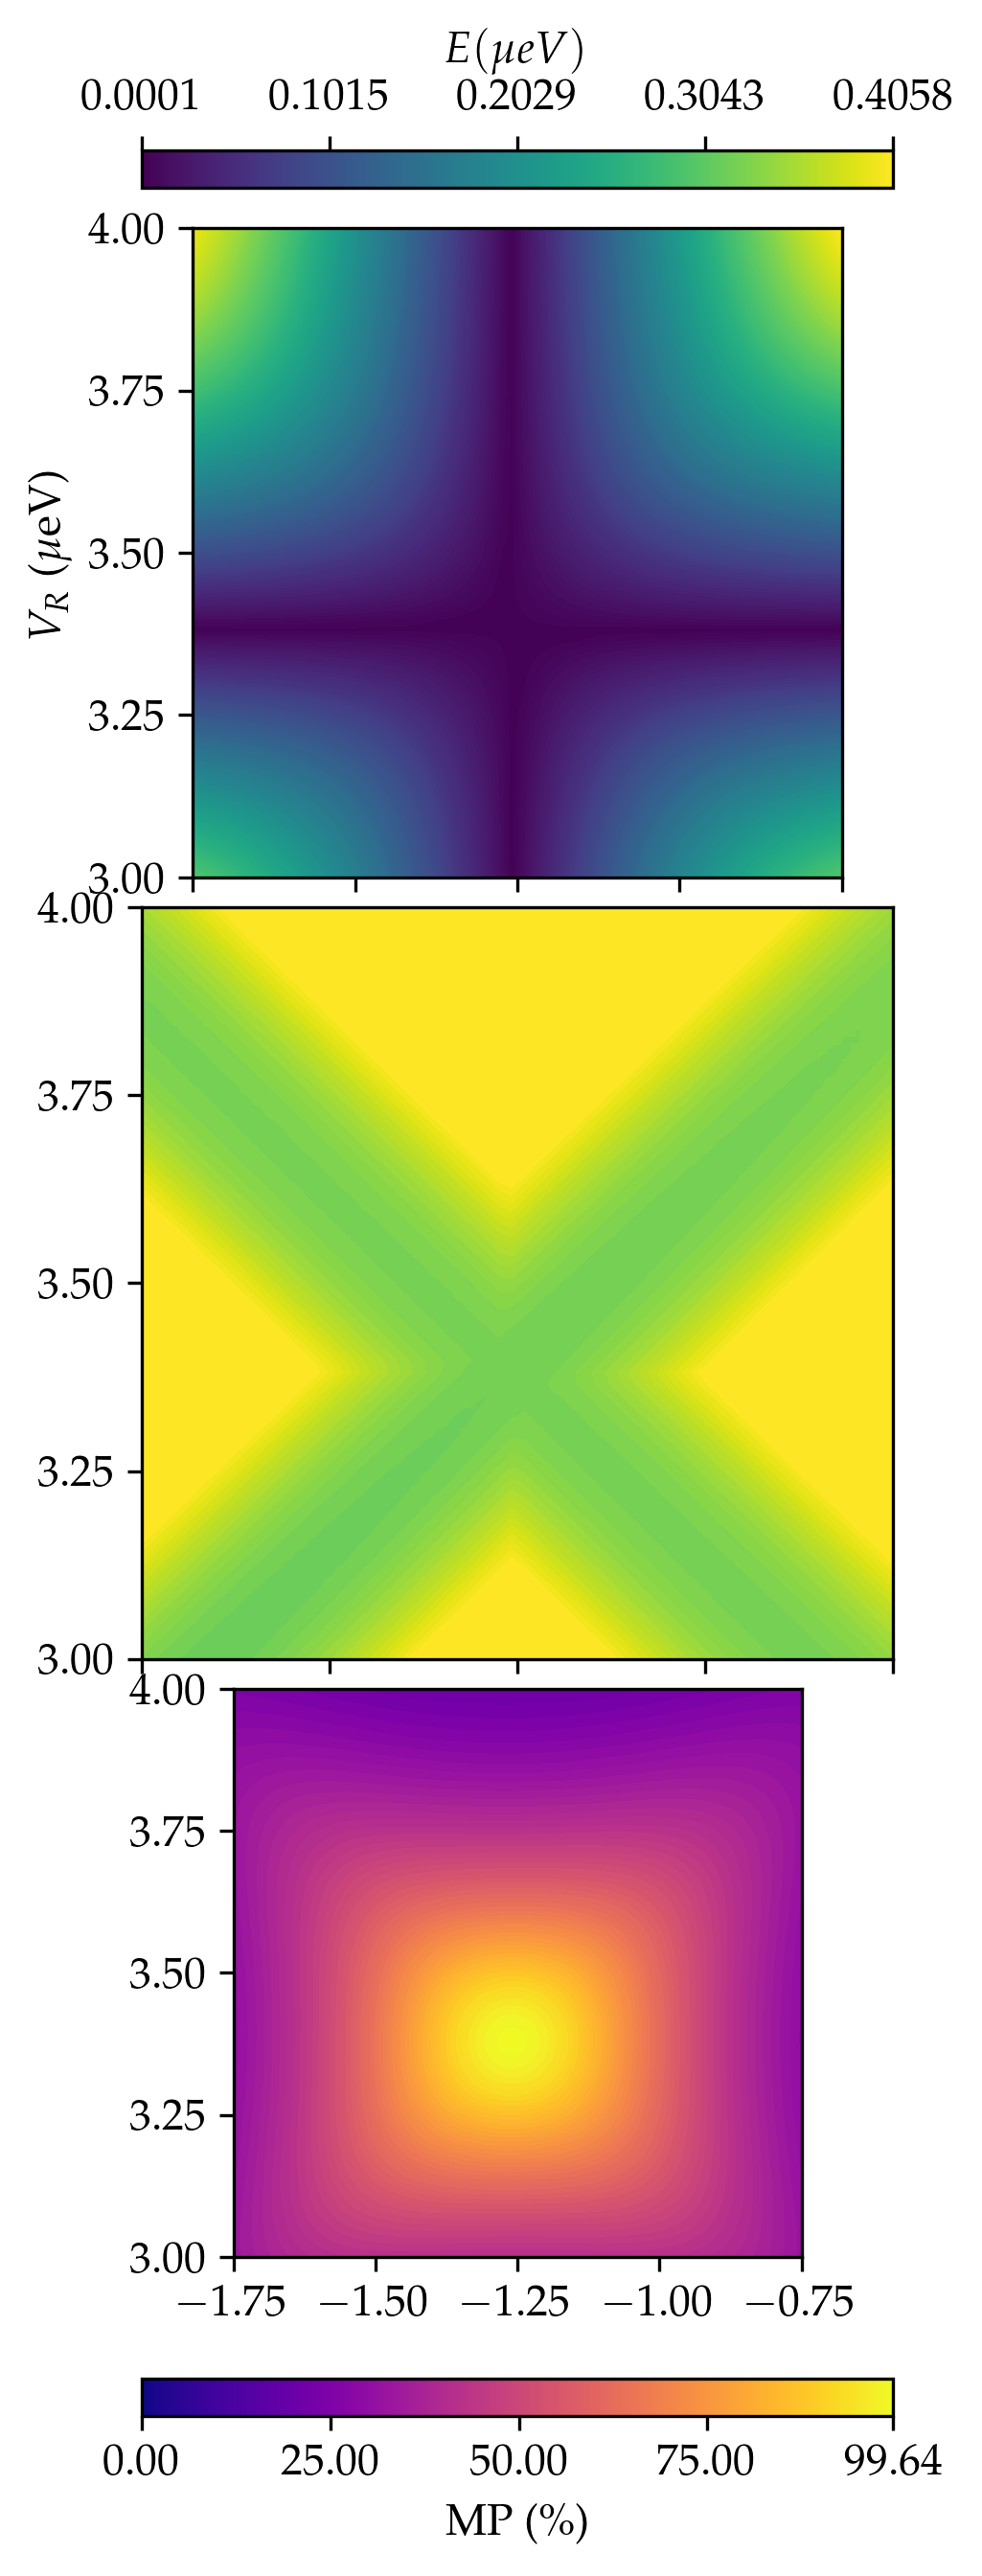

In [28]:
_i = -1
from matplotlib.colors import PowerNorm,LogNorm,Normalize,Colormap
from matplotlib import cm,ticker


alter_plot = 'overlaps_0'

third_plot = 'deltaE'
power_norm = PowerNorm(gamma=10)
Z = np.abs(df[alter_plot])
power_norm.autoscale(np.abs(Z))

cbar_ticks = np.linspace(np.min(Z)**10,np.max(Z)**10,12)**(0.10)

xs = []
ys = []

for n,g in df.groupby('mu_sc_val'):
    _i+=1
    if _i != 2:
        continue 
    #fig,axs=plt.subplots(ncols=1,nrows=3,sharex=True,sharey=True)
    fig=plt.figure()
    gs=fig.add_gridspec(3,hspace=0)
    axs = gs.subplots(sharex=True,sharey=True)
    fig.set_figheight(11)
    ax=axs[0]
    
    #fig.suptitle(n)
    
    Y = 4603.38-base_E
    X = 4598.74-base_E
    
    equal_aspect = True
    if equal_aspect:
        mL_ticks = np.linspace(g['mL'].min(),g['mL'].max(),5)
        mR_ticks = np.linspace(g['mR'].min(),g['mR'].max(),5)
        for a in axs:
            a.set_aspect('equal')
        
    else:
        #mL_ticks = np.linspace(g['mL'].min(),g['mL'].max(),9)[1:-1]
        mL_ticks = np.linspace(g['mL'].min(),g['mL'].max(),5)
        mR_ticks = np.linspace(g['mR'].min(),g['mR'].max(),9)[1:-1]
        
    eN = 0
    E_norm_range=(min(g['E0'].min(),g['deltaE'].min()),max(g['E0'].max(),g['deltaE'].max()))
    E_norm_range = (g['E0'].min(),g['E0'].max())
    E_ticks = np.linspace(*E_norm_range,5)
    log_norm = LogNorm(*E_norm_range)
    log_norm = Normalize(*E_norm_range)
    log_map = Colormap('viridis')
    log_map = cm.viridis
    #log_norm = Normalize().autoscale(g[f'E{eN}'])
    f=ax.tricontourf(g['mL'],g['mR'],log_norm(g[f'E0']),levels=128)
    #fig.suptitle(r'$\mu_{SC}=$'+f'{np.round(n,1)}'+ r'$\mu$eV')
    #ax.axhline(Y)
    #ax.axvline(X)
    #cb.locator = tick_locator
    
    
    cb=fig.colorbar(cm.ScalarMappable(norm=log_norm,cmap=log_map),label=rf'$E (\mu eV)$',ax=ax,norm=log_norm,orientation='horizontal',location='top',ticks=E_ticks)
    tick_locator = ticker.MaxNLocator(nbins=5)
    ax.set_xlabel(r'$V_L$ ($\mu$eV)')
    ax.set_xticks(mL_ticks)
    
    ax.set_ylabel(r'$V_R$ ($\mu$eV)')
    ax=axs[1]
    z=np.abs(g['deltaE'])
    #ax.set_aspect('equal')
    f=ax.tricontourf(g['mL'],g['mR'],z,levels=64,norm=log_norm)
    #cb=fig.colorbar(cm.ScalarMappable(norm=log_norm,cmap=log_map),cax=ax,label=rf'$E (\mu eV)$',ax=ax,norm=log_norm,orientation='horizontal',location='top',ticks=E_ticks)
    #ax.axhline(Y)
    #ax.axvline(X)
    
    
    ax = axs[2]
    #ax.axhline(Y)
    ax.set_yticks(mR_ticks)
    #ax.axvline(X)
    mp_cmap = cm.plasma
    #ax.set_aspect('equal')
    nmax=np.real(g["overlaps_new_0"].max())*100
    mp_norm = Normalize(0,nmax)
    f=ax.tricontourf(g['mL'],g['mR'],np.real(g['overlaps_new_0'])*100,levels=64,norm=mp_norm,cmap=mp_cmap)
    #make ticks that also have endpoints:
    mp_ticks = np.linspace(0,100,5)
    mp_ticks[-1] = nmax
    cb=fig.colorbar(cm.ScalarMappable(norm=mp_norm,cmap=mp_cmap),label=r'MP (\%)',ax=ax,orientation='horizontal',ticks=mp_ticks)
    #    ax.legend(title=r'$MP_{max}$:'+f' {nmax:2}')

    #ax.set_xlabel(r'$V_L$ [$\mu$eV]')  
    plt.savefig('sweet_spot.pdf')
    break
    